In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Prevent fuzziness for retina/3K screens, comment out on other screen types.
from lblcrn import *

## Step 1 Define the Reaction System

Supply the reaction rules. Be sure to double check that the rates are correct.

In [2]:
sm = SpeciesManager()
s = Surface("forest", (10, 10), color="#e1e1e1")
prey = sm.sp('rabbit', Orbital('1s', 1.0))
pred = sm.sp('wolf', Orbital('1s', 2), size=2)

rsys = RxnSystem(
    sm,
    s,

    SurfaceRxn([prey, pred], [pred, pred], 1),
    SurfaceRxn([prey, s], [prey, prey], 1),
    SurfaceRxn([pred], [s], 0.1),
   
    SurfaceRxn([pred, s], [s, pred], 1),
    SurfaceRxn([prey, s], [s, prey], 1),

    Conc(pred, 2),
    Conc(prey, 2),
)

## Step 2 the Secret Sausage

In [3]:
ensemble_1 = scrn_simulate(rsys, 5, video=True, video_path="predator prey", ensemble_size=3)            

The directory /Users/ye/Desktop/lbl-crn/predator prey already exists, would you like to overwrite the directory? 
Type "Yes" if you do, or "No" if otherwise: no


Please choose a different path for the videos.
Program exits


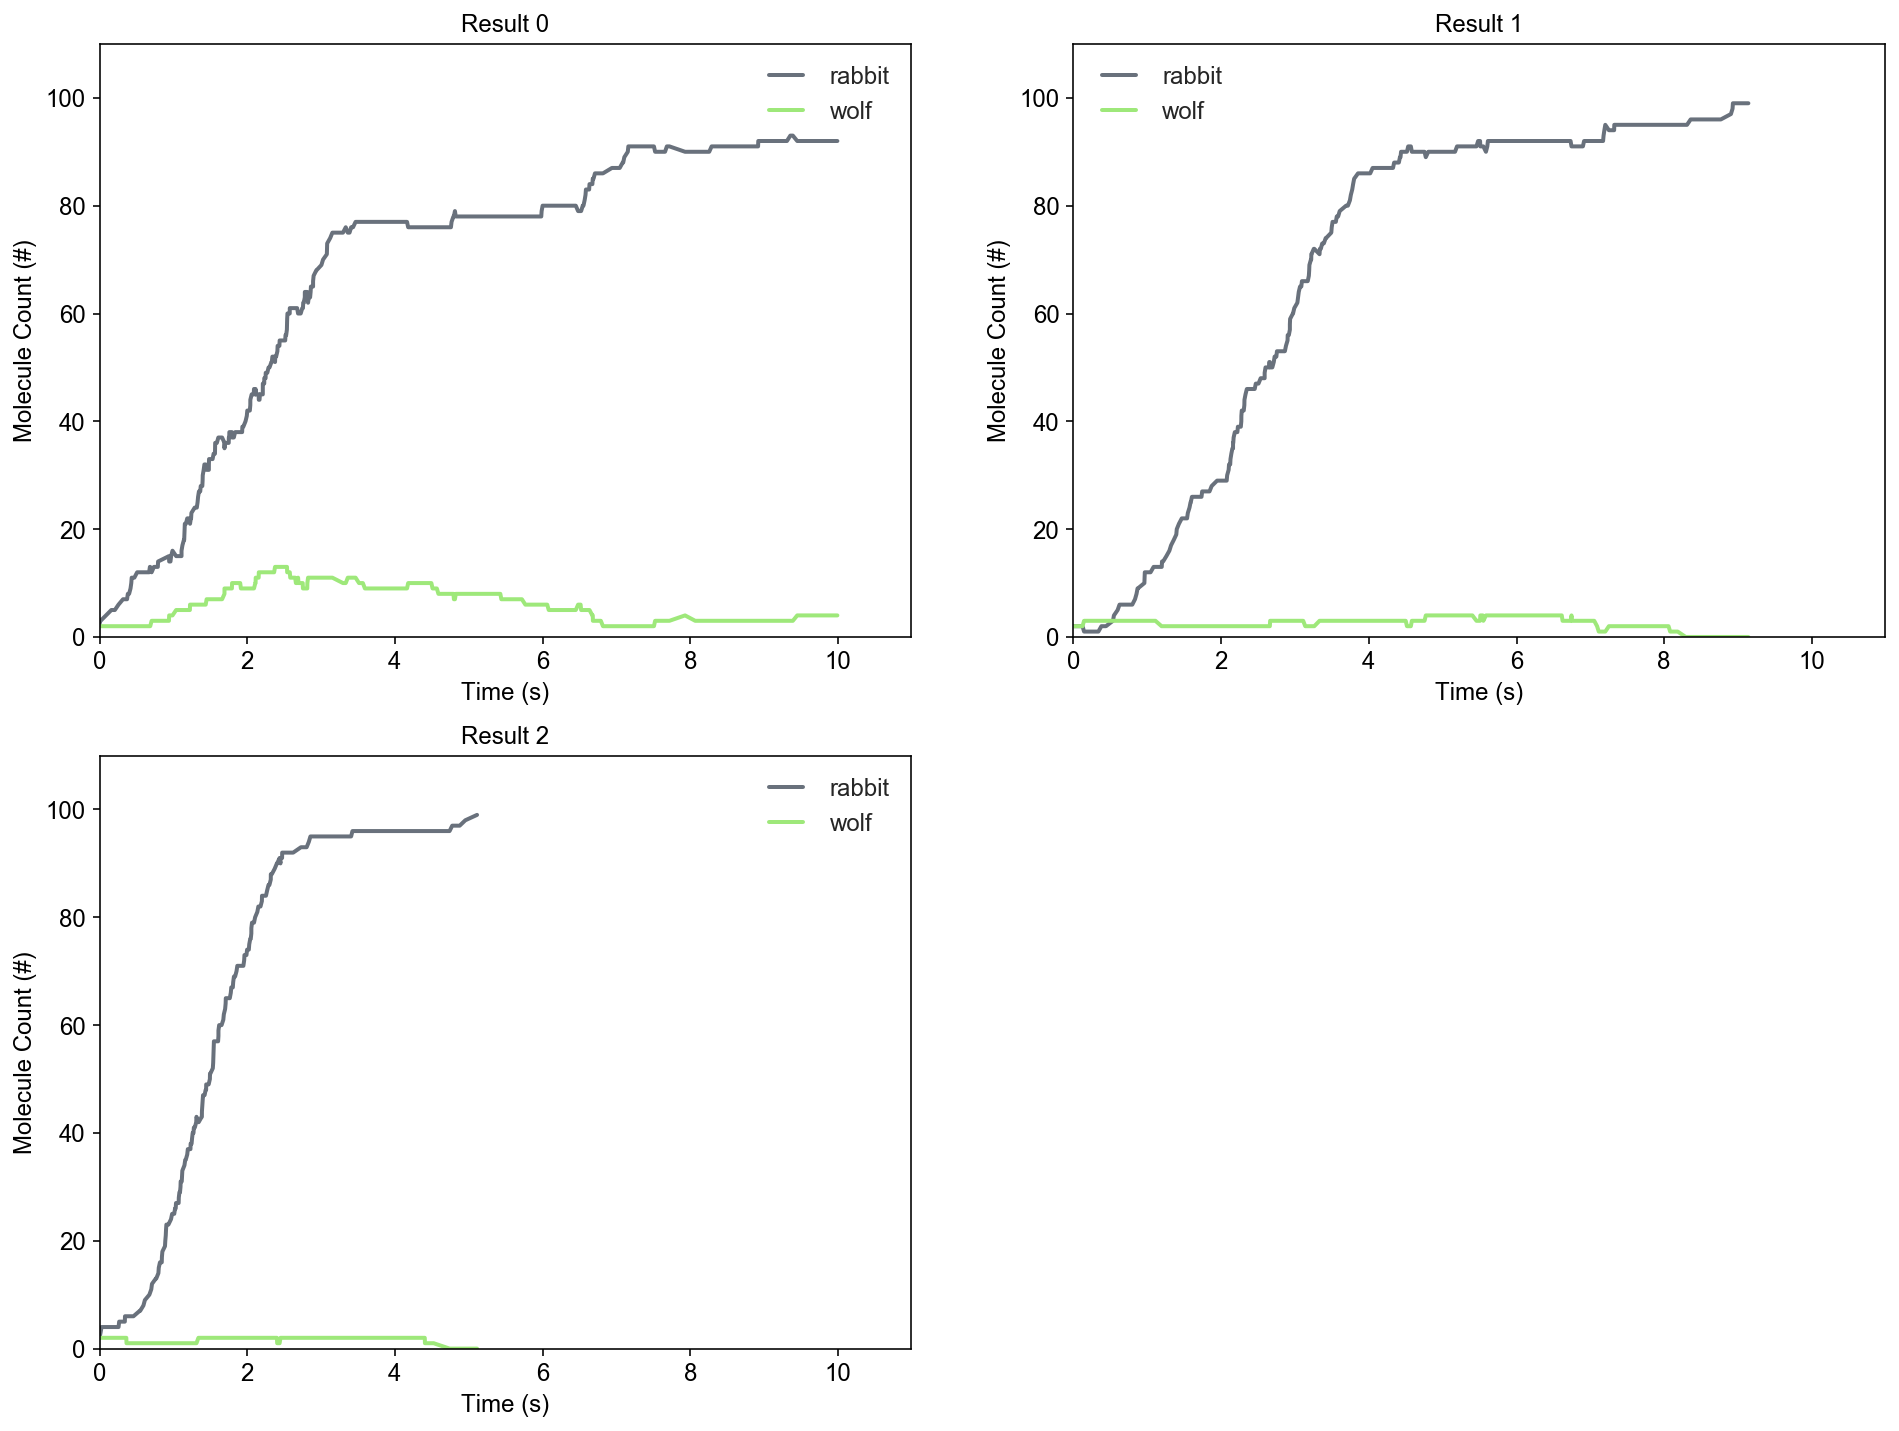

In [4]:
ensemble_1.plot_all()

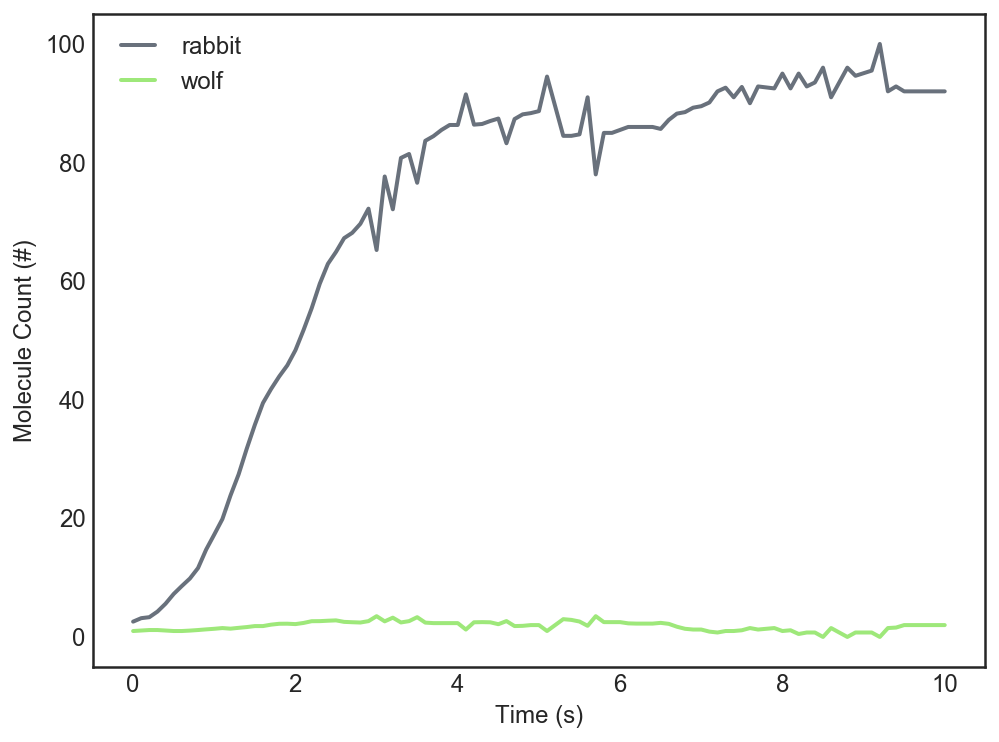

In [5]:
ensemble_1.plot_mean()

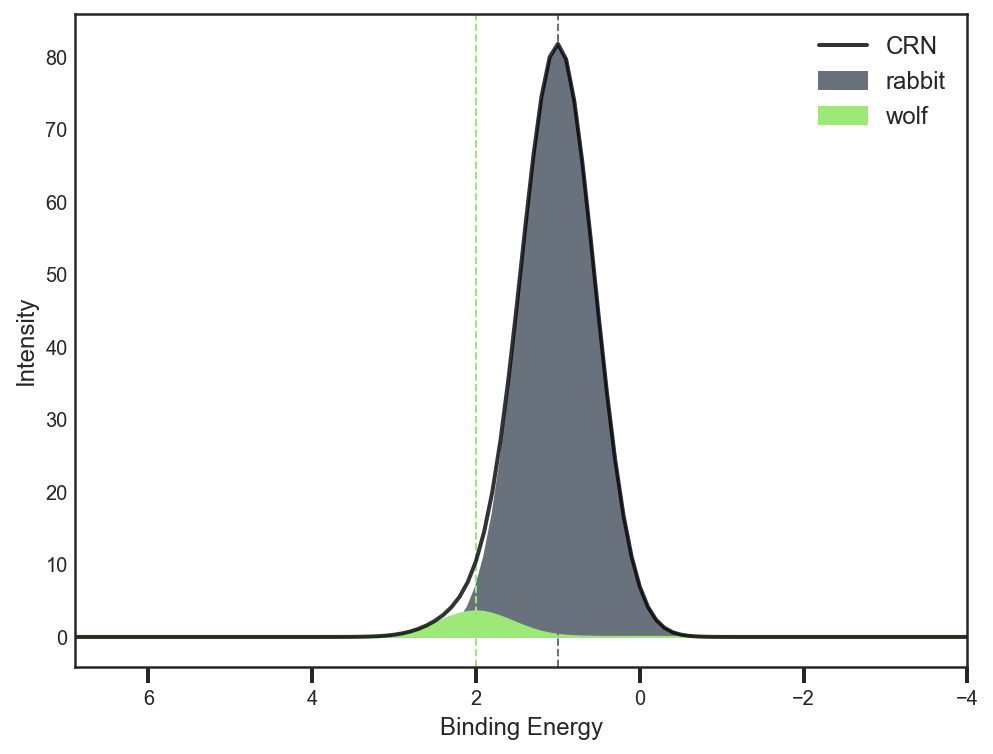

In [8]:
ensemble_1[0].plot_gaussian(t=-1)

## Use A Hexagonal Structure, Ag on H2O with H2O_multi occupying 2 spaces##

In [9]:
sm = SpeciesManager()
s = Surface("Ag", (10, 10), structure="hexagon", color="#e1e1e1")

h2o_star = sm.sp("H2O*", Orbital('1s', 532.2))
h2o_multi = sm.sp("H2O_multi", Orbital('1s', 533.2), size=2)
h2o_o_hb = sm.sp("H2O_O_hb", Orbital('1s', 531.6))
h2o_oh_hb = sm.sp("H2O_OH_hb", Orbital('1s', 531.6))
sm.name_be("H2O_hb", 531.6)
o_star = sm.sp("O*", Orbital('1s', 530.0))
oh_star = sm.sp("OH*", Orbital('1s', 530.9))
o_star_threef = sm.sp(o_star, site=s.threefold)
oh_star_threef = sm.sp(oh_star, site=s.threefold)


rsys = RxnSystem(
    sm,
    s,

    SurfaceRevRxn([o_star], [h2o_o_hb], 1.238045, 0.127713),
    SurfaceRevRxn([oh_star], [h2o_oh_hb], 0.526204, 0.30048),
    SurfaceRevRxn([h2o_o_hb, s.threefold], [oh_star, oh_star_threef], 6.220646, 0.160755),
    SurfaceRevRxn([h2o_oh_hb, s.threefold], [h2o_star, oh_star_threef], 0.299507, 1),
    SurfaceRevRxn([h2o_o_hb, s.threefold], [h2o_star, o_star_threef], 0.16713, 1),
   
    SurfaceRevRxn([h2o_star], [s], 0.794455, 0.199022),
    SurfaceRevRxn([h2o_oh_hb], [h2o_multi], 0.400796, 0.3945),
    
    SurfaceRevRxn([o_star_threef, o_star_threef], [s.threefold, s.threefold], 0.00096, 76.964514),
    
    SurfaceRxn([s.threefold, o_star_threef], [o_star_threef, s.threefold], 3),
    SurfaceRxn([s.threefold, oh_star_threef], [oh_star_threef, s.threefold], 3),
    SurfaceRxn([s, o_star], [o_star, s], 3),
    SurfaceRxn([s, oh_star], [oh_star, s], 3),
    SurfaceRxn([s, h2o_star], [h2o_star, s], 3),
    
    
    SurfaceRevRxn([oh_star, s.threefold], [s, oh_star_threef], 10, 0.5),
    SurfaceRevRxn([o_star, s.threefold], [s, o_star_threef], 10, 0.5),

    Conc(o_star_threef, 25),
)

In [10]:
ensemble_2 = scrn_simulate(rsys, 200, video=False, spectra_in_video=True, spectra_average_duration=3, ensemble_size=4)

Simulation completed: [################################################################################] 100.0%


/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


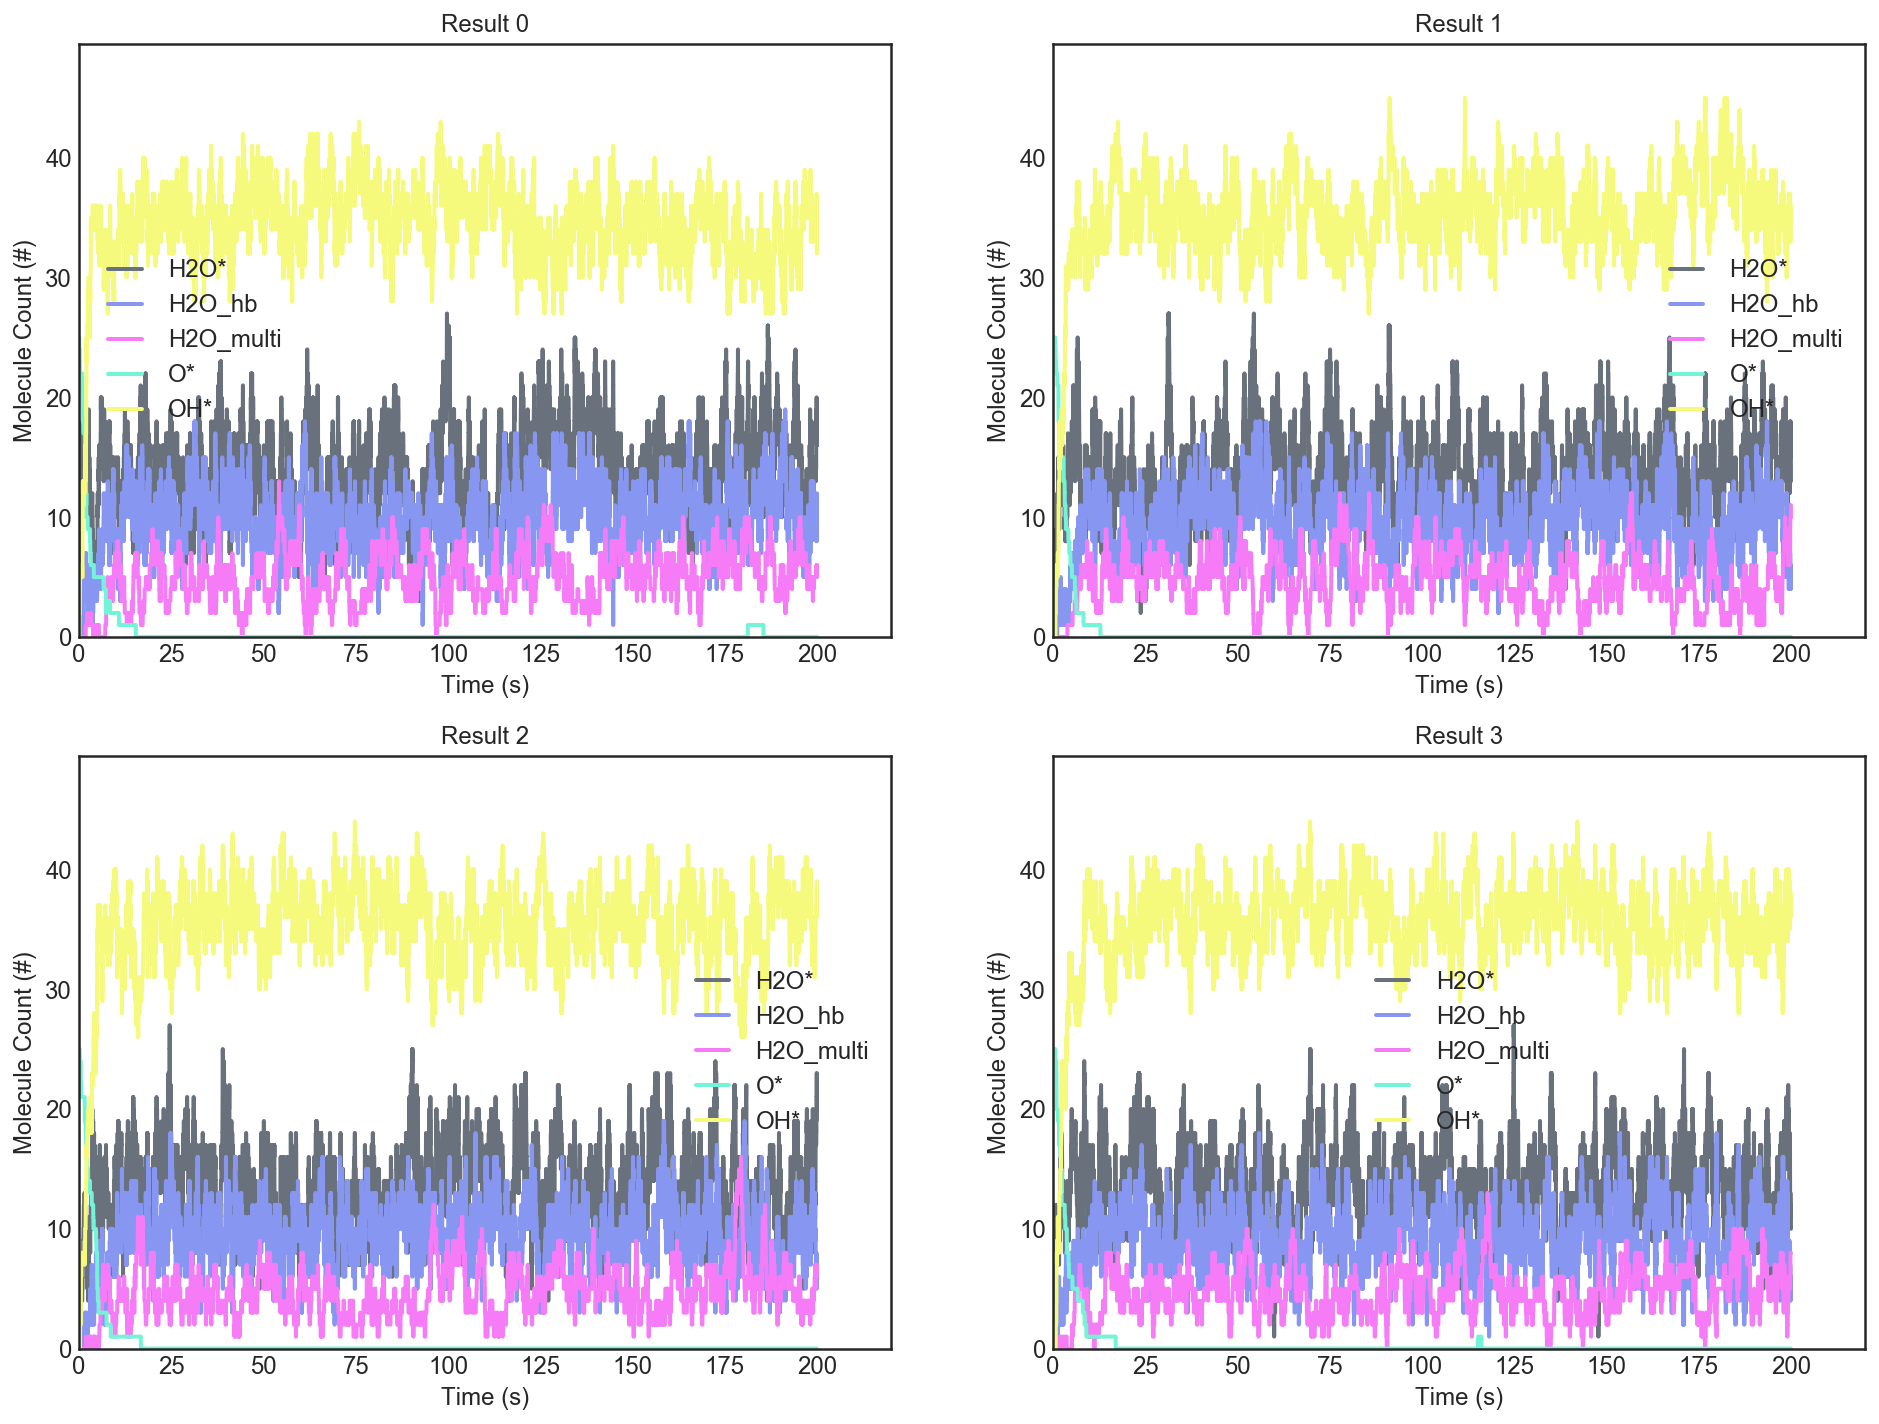

In [11]:
ensemble_2.plot_all()

In [12]:
results_2_0 = scrn_simulate(rsys, 200, video=True, video_path="H2O on Ag Double Size", spectra_in_video=True, spectra_average_duration=3)

Generating video frames completed: [################################################################################] 100.0%


In [13]:
results_2_0.play_video()

## Ag on H2O with H2O_multi occupying 1 space

In [14]:
sm = SpeciesManager()
s = Surface("Ag", (10, 10), structure="hexagon", color="#e1e1e1")

h2o_star = sm.sp("H2O*", Orbital('1s', 532.2))
h2o_multi = sm.sp("H2O_multi", Orbital('1s', 533.2))
h2o_o_hb = sm.sp("H2O_O_hb", Orbital('1s', 531.6))
h2o_oh_hb = sm.sp("H2O_OH_hb", Orbital('1s', 531.6))
sm.name_be("H2O_hb", 531.6)
o_star = sm.sp("O*", Orbital('1s', 530.0))
oh_star = sm.sp("OH*", Orbital('1s', 530.9))
o_star_threef = sm.sp(o_star, site=s.threefold)
oh_star_threef = sm.sp(oh_star, site=s.threefold)


rsys = RxnSystem(
    sm,
    s,

    SurfaceRevRxn([o_star], [h2o_o_hb], 1.238045, 0.127713),
    SurfaceRevRxn([oh_star], [h2o_oh_hb], 0.526204, 0.30048),
    SurfaceRevRxn([h2o_o_hb, s.threefold], [oh_star, oh_star_threef], 6.220646, 0.160755),
    SurfaceRevRxn([h2o_oh_hb, s.threefold], [h2o_star, oh_star_threef], 0.299507, 1),
    SurfaceRevRxn([h2o_o_hb, s.threefold], [h2o_star, o_star_threef], 0.16713, 1),
   
    SurfaceRevRxn([h2o_star], [s], 0.794455, 0.199022),
    SurfaceRevRxn([h2o_oh_hb], [h2o_multi], 0.400796, 0.3945),
    
    SurfaceRevRxn([o_star_threef, o_star_threef], [s.threefold, s.threefold], 0.00096, 76.964514),
    
    SurfaceRxn([s.threefold, o_star_threef], [o_star_threef, s.threefold], 3),
    SurfaceRxn([s.threefold, oh_star_threef], [oh_star_threef, s.threefold], 3),
    SurfaceRxn([s, o_star], [o_star, s], 3),
    SurfaceRxn([s, oh_star], [oh_star, s], 3),
    SurfaceRxn([s, h2o_star], [h2o_star, s], 3),
    
    
    SurfaceRevRxn([oh_star, s.threefold], [s, oh_star_threef], 10, 0.5),
    SurfaceRevRxn([o_star, s.threefold], [s, o_star_threef], 10, 0.5),

    Conc(o_star_threef, 25),
)

In [15]:
ensemble_3 = scrn_simulate(rsys, 200, video=False, spectra_in_video=False, spectra_average_duration=3, ensemble_size=4)

Simulation completed: [################################################################################] 100.0%


In [16]:
results_3_0 = scrn_simulate(rsys, 200, video=True, video_path="H2O on Ag Single Size", spectra_in_video=True, spectra_average_duration=3)

Generating video frames completed: [################################################################################] 100.0%


In [17]:
results_3_0.play_video()

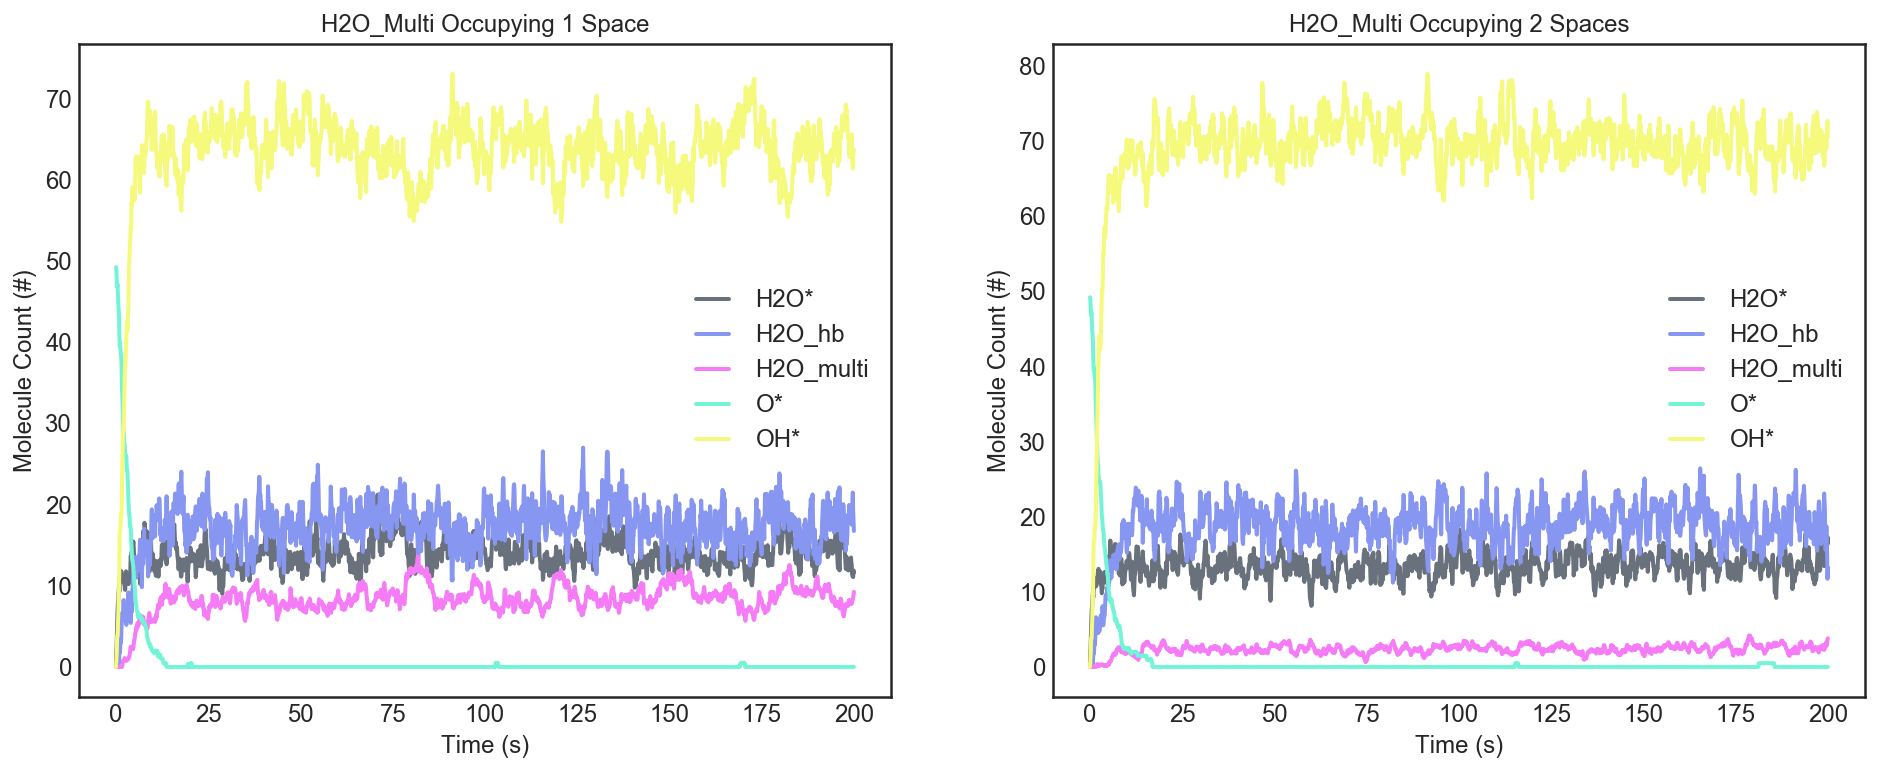

In [21]:
axes = Results.side_by_side_axes()
ensemble_3.plot_mean(ax=axes[0], title="H2O_Multi Occupying 1 Space")
ensemble_2.plot_mean(ax=axes[1], title="H2O_Multi Occupying 2 Spaces")

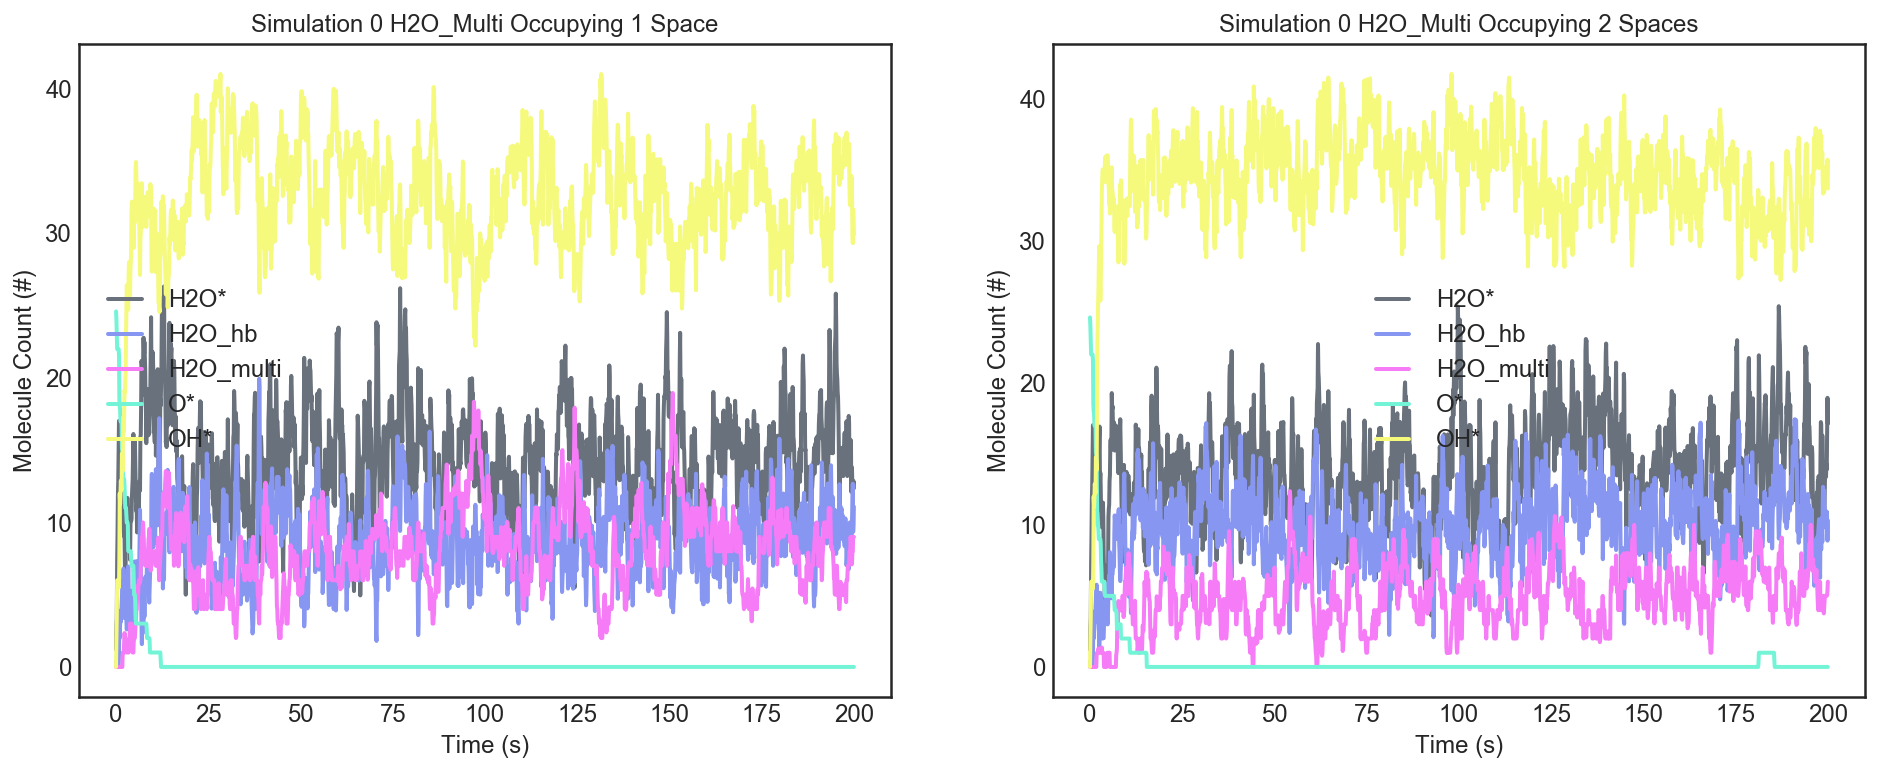

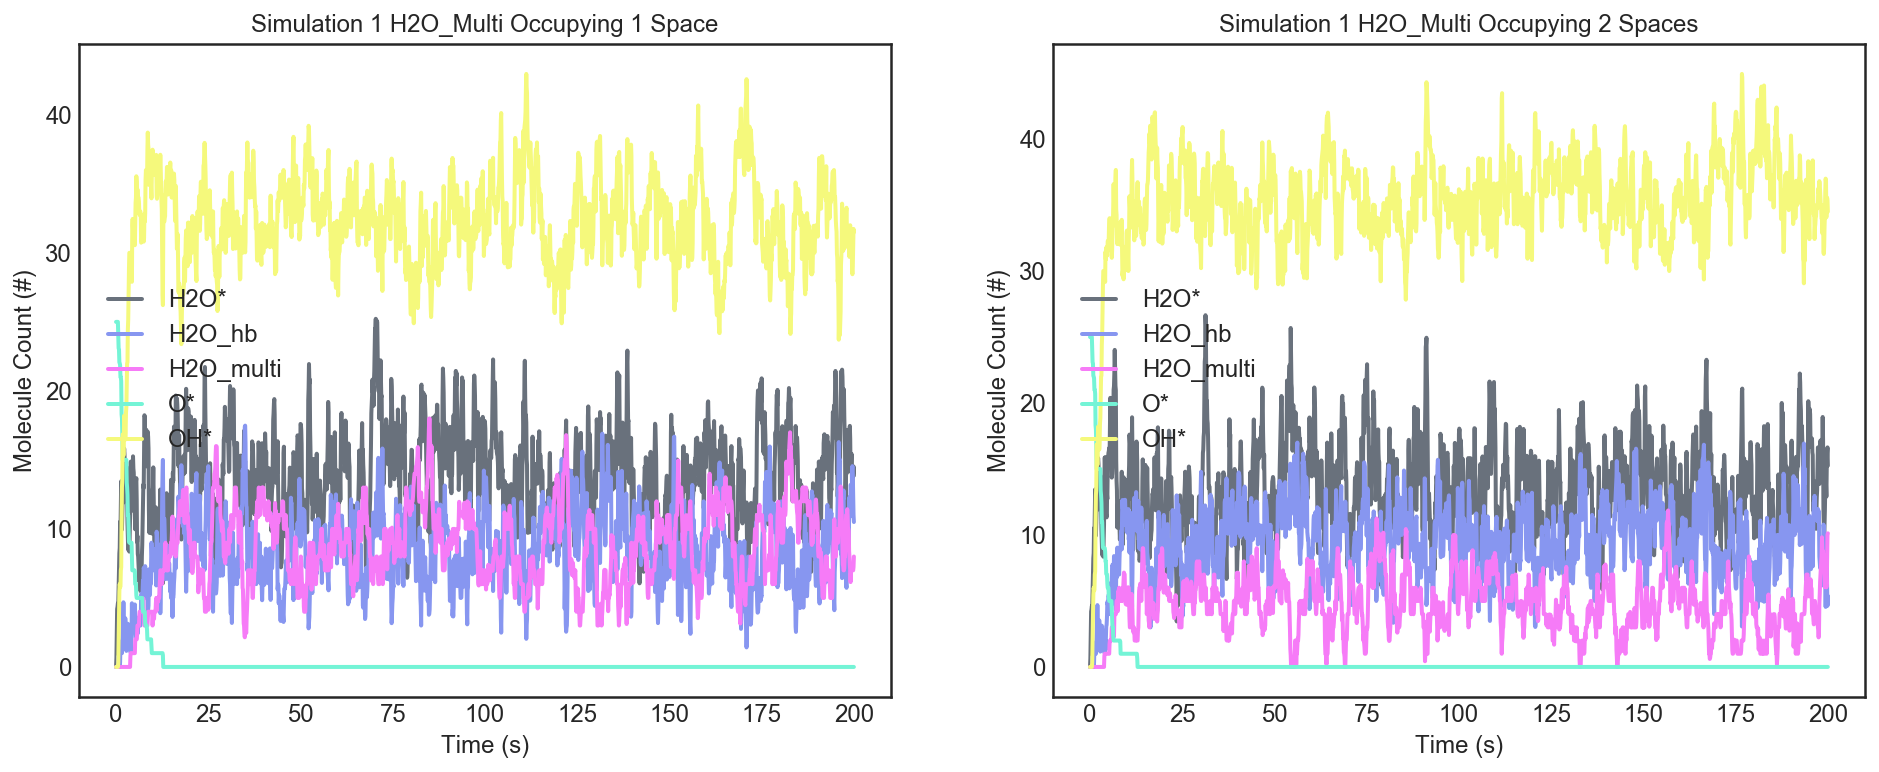

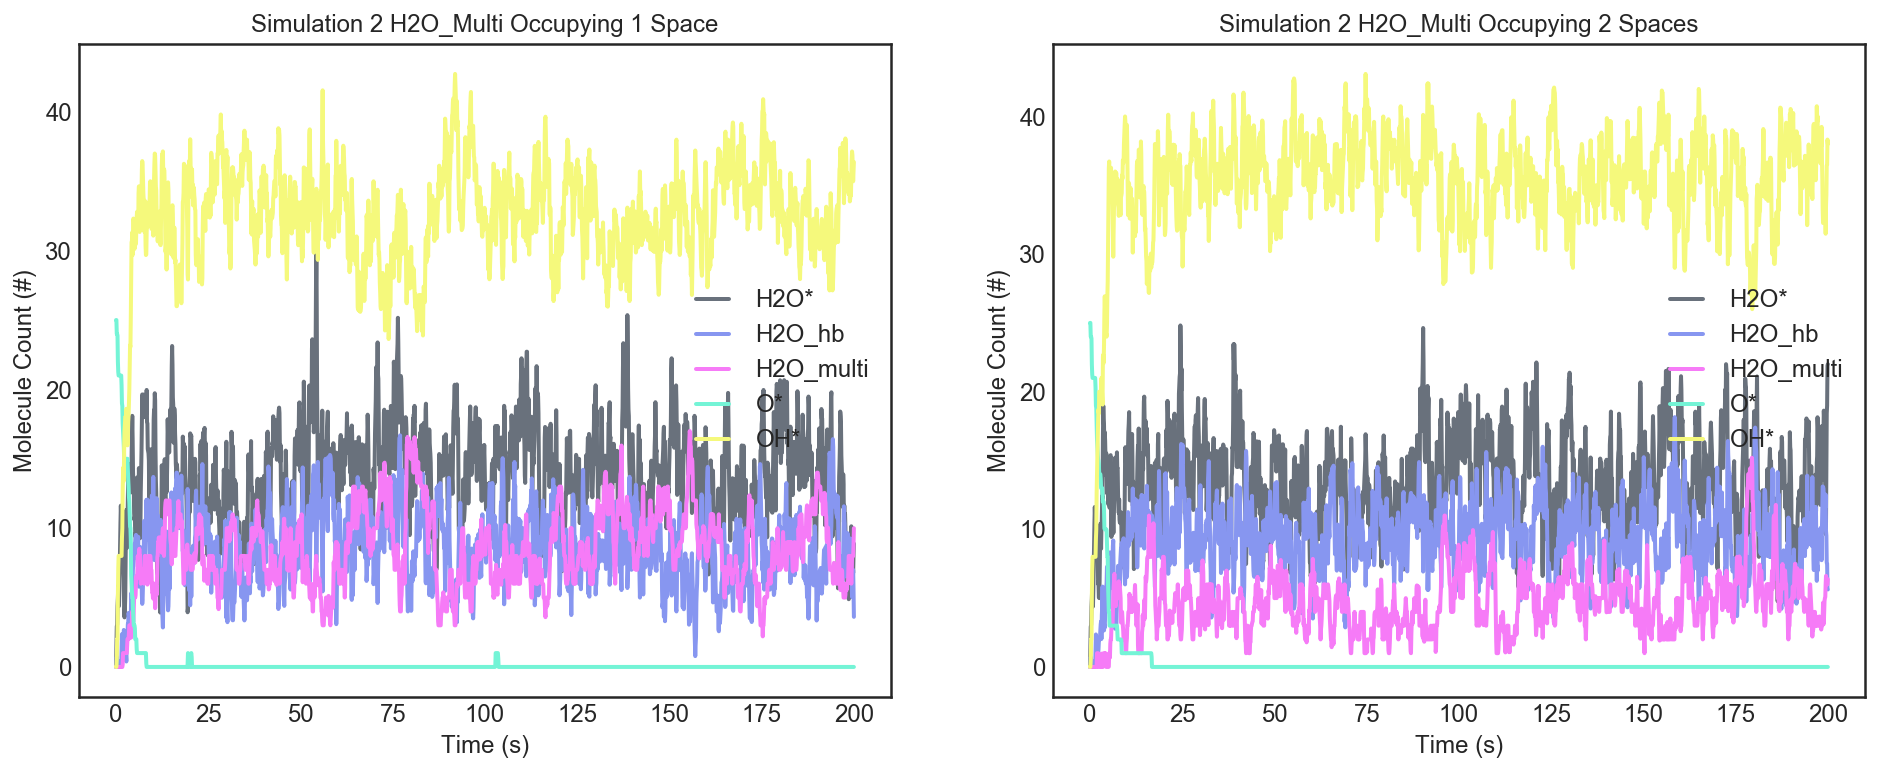

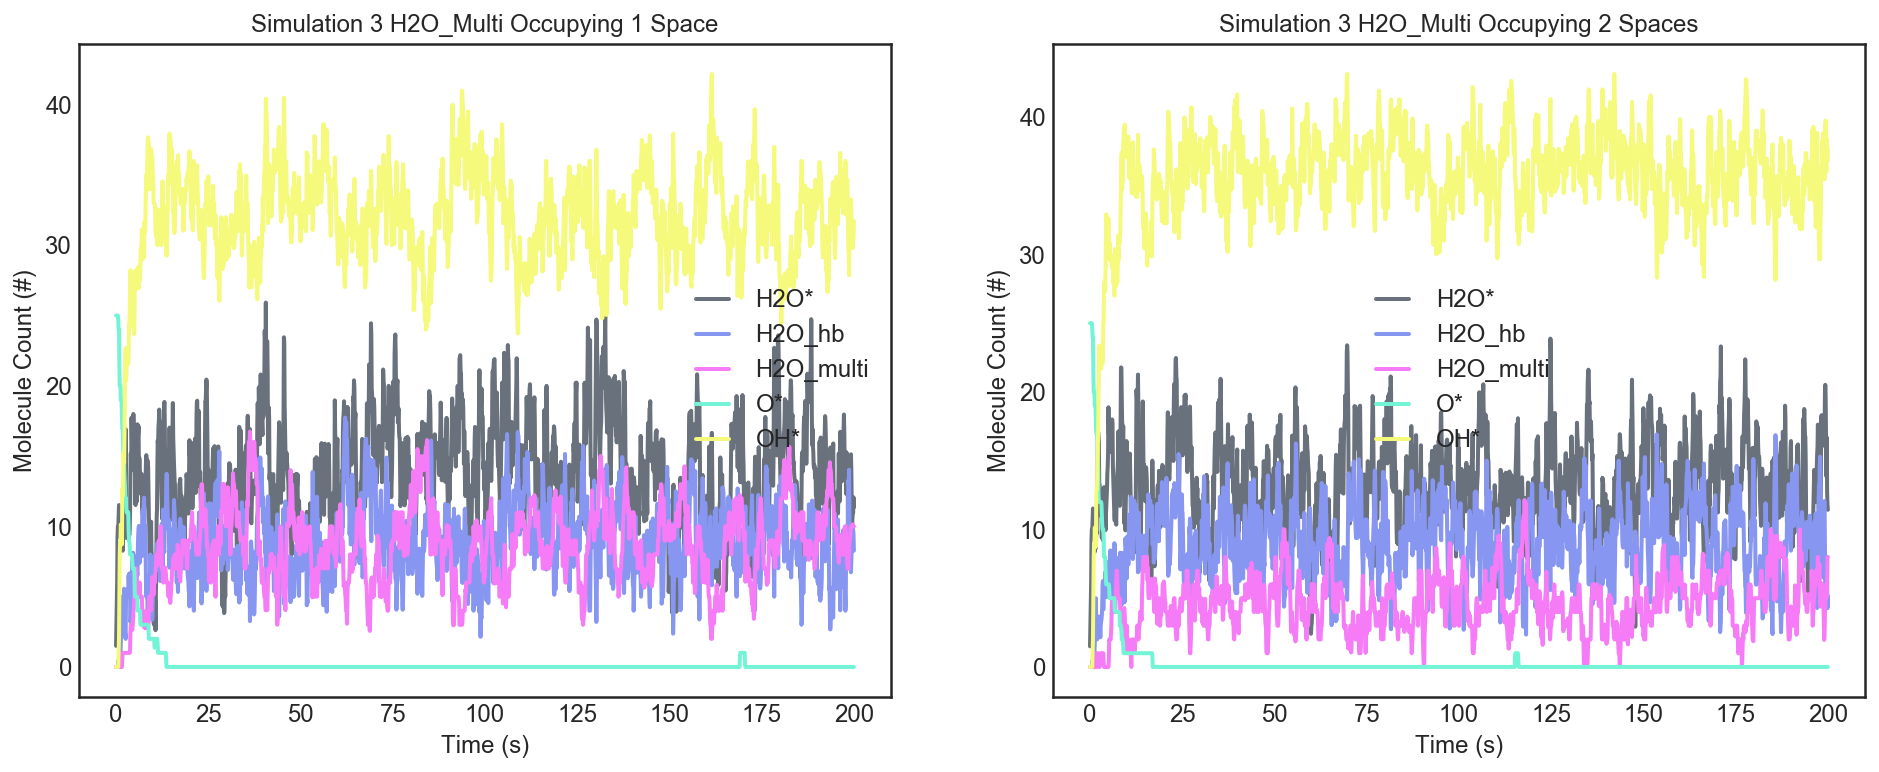

In [23]:
for i in range(4):
    axes = Results.side_by_side_axes()
    ensemble_3[i].plot_evolution(ax=axes[0], title=f"Simulation {i} H2O_Multi Occupying 1 Space")
    ensemble_2[i].plot_evolution(ax=axes[1], title=f"Simulation {i} H2O_Multi Occupying 2 Spaces")